In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [57]:
pd.set_option('display.max_columns', None)

In [5]:
accident = pd.read_csv("dft-road-casualty-statistics-accident-2020.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataset = pd.read_csv("dataset_canvas.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,18,21,22,23,26,27,28,30,35,36,37,39,40,41,42,43,48,49,50,51,52,53,54,55,56,57,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
casuality_1979 = pd.read_csv("dft-road-casualty-statistics-casualty-1979-2020.csv")

In [5]:
casuality = pd.read_csv("dft-road-casualty-statistics-casualty-2020.csv")

In [6]:
vehicles = pd.read_csv("dft-road-casualty-statistics-vehicle-2020.csv")

In [7]:
vehicles_1979 = pd.read_csv("dft-road-casualty-statistics-vehicle-1979-2020.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,2,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
## Visualsing- 2015 dataset

In [ ]:
## ToDo:
# Visualise stats from all attributes 
# Get multicolineary for variables and comment on which one is useful 
# further look into drug use, other relavnt areas for spikes in traffic caulaties 
# and how to maintain everything
# check the distribtion of stuff

In [4]:
# Splitting of dataset df
location = dataset[['Location_Easting_OSGR',
                   'Location_Northing_OSGR',
                   'Longitude', 'Latitude',
                   'LSOA_of_Accident_Location',
                   'Urban_or_Rural_Area']]
road = dataset[['Accident_Index', 'Date', 'Day_of_Week', 'Time',
                'Number_of_Vehicles',
               '1st_Road_Class',
               '1st_Road_Number',
               'Road_Type',
               'Speed_limit',
               'Junction_Detail',
               'Junction_Control',
               '2nd_Road_Class',
               '2nd_Road_Number',
               'Pedestrian_Crossing-Human_Control',
               'Pedestrian_Crossing-Physical_Facilities',
               'Light_Conditions',
               'Weather_Conditions',
               'Road_Surface_Conditions',
               'Special_Conditions_at_Site',
               'Carriageway_Hazards',
               'Pedestrian_Location',
               'Pedestrian_Movement',
               "Junction_Location",
               "Skidding_and_Overturning"]]

casualty_metrics = dataset[['Accident_Index', 'Date', 
                            'Day_of_Week', 'Time','Accident_Severity',
                 'Number_of_Casualties',
                 'Casualty_Reference',
                     'Casualty_Class',
                     'Casualty_Severity',
                     'Casualty_Type',
                     'Vehicle_Manoeuvre',]]
accident = dataset[['Accident_Index', 'Date', 'Day_of_Week', 'Time',
             '1st_Point_of_Impact']]

driver = dataset[['Accident_Index', 'Date', 'Day_of_Week', 'Time',
           'Sex_of_Driver',
          'Journey_Purpose_of_Driver',
          'Age_of_Driver',
          'Age_Band_of_Driver',
          'Driver_Home_Area_Type']]

casualty = dataset[['Accident_Index', 'Date', 'Day_of_Week', 'Time',
             "Casualty_Home_Area_Type",
            'Age_Band_of_Casualty',
            'Sex_of_Casualty']]

In [5]:
index = ['Accident_Index', 'Date', 'Day_of_Week', 'Time']

In [6]:
casualty_metrics.Casualty_Type.unique()

array([ 0,  1,  3,  9,  5,  8, 11,  4, 19,  2, 20, 90, 21, 10, 17, 18, 16,
       22, 97, 98, 23])

In [7]:
one = casualty_metrics.Accident_Severity.value_counts(normalize=True).sort_index()

two = casualty_metrics.Casualty_Severity.value_counts(normalize=True).sort_index()

three = (casualty_metrics.Casualty_Class.value_counts(normalize=True))

In [8]:
#x = [one.keys().tolist(), two.keys().tolist(),three.keys().tolist()]
x = [1, 2, 3]
y = one.tolist()
z = two.tolist()
k = three.tolist()


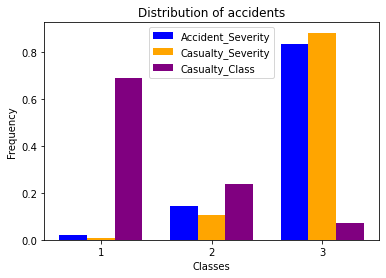

In [39]:
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = one
bar1 = plt.bar(ind, xvals, width, color = 'blue')
  
yvals = two
bar2 = plt.bar(ind+width, yvals, width, color='orange')
  
zvals = three
bar3 = plt.bar(ind+width*2, zvals, width, color = 'purple')
  
plt.xlabel("Classes")
plt.ylabel('Frequency')
plt.title("Distribution of accidents")
  
plt.xticks(ind+width,[1, 2, 3])
plt.legend( (bar1, bar2, bar3), ('Accident_Severity', 'Casualty_Severity', 'Casualty_Class') )
plt.show()

In [10]:

continous = casualty_metrics[["Number_of_Casualties",
                 "Casualty_Reference",
                  "Casualty_Type"]].describe()

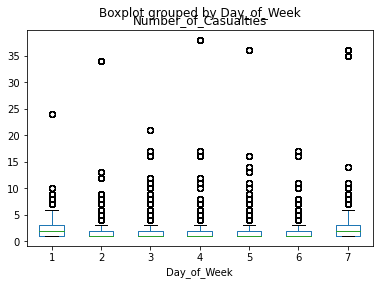

In [11]:
casualty_metrics.boxplot(by ='Day_of_Week', column =['Number_of_Casualties'], grid = False);


In [12]:
# road.Skidding_and_Overturning
vals = []
for col in road:
    vals.append(road[col].unique())
cols = road.columns
categorical_or = list(zip(cols, vals))

In [14]:
junction_location = []
for i in dataset.Junction_Location:
    if i == '?':
        junction_location.append(-1)
    else:
        junction_location.append(int(i))
        
dataset['junction_location'] = junction_location

In [15]:
new_dataset = dataset[['Number_of_Casualties', 'junction_location']]

<AxesSubplot:title={'center':'Number of Causailties at Junction'}, xlabel='Junction', ylabel='# Casualities'>

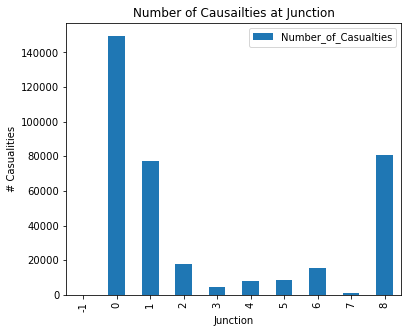

In [16]:
dfg = new_dataset.groupby(['junction_location']).count()
dfg.plot(kind='bar', title='Number of Causailties at Junction', ylabel='# Casualities',
         xlabel='Junction', figsize=(6, 5))

In [32]:
def processing(df, col, name):
    lst = []
    for i in df[col]:
        if i == '?':
            lst.append(-1)
        else:
            lst.append(int(i))
        
    dataset[name] = lst
    
    
def graphing(df, col_name, title, x_lab):
    new_dataset = df[['Number_of_Casualties', col_name]]
    dfg = new_dataset.groupby([col_name]).mean()
    dfg.plot(kind='bar', title=title, ylabel='# Casualities',
         xlabel=x_lab, figsize=(6, 5))
    

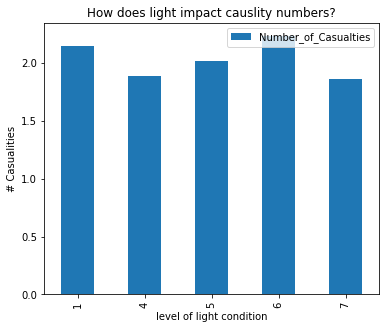

In [33]:
graphing(dataset, "Light_Conditions", "How does light impact causlity numbers?",
        "level of light condition")

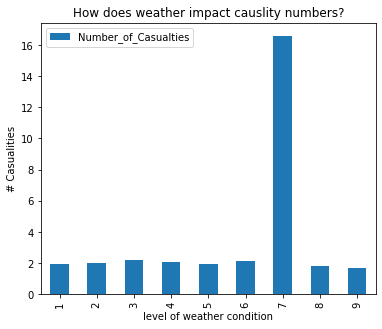

In [35]:
graphing(dataset, "Weather_Conditions", "How does weather impact causlity numbers?",
        "level of weather condition")


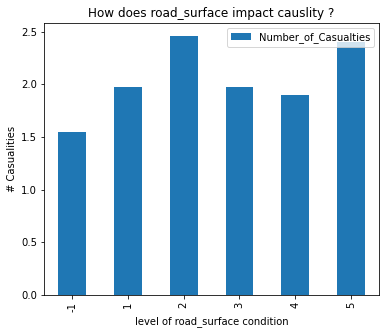

In [37]:
processing(dataset, "Road_Surface_Conditions", "road_surface")
graphing(dataset, "road_surface", "How does road_surface impact causlity ?",
        "level of road_surface condition")

In [ ]:
# Effect of conditions on accident through out time
# Junction location and accidents

dataset.plot(x = "junction_location", y = "Number_of_Casualties", kind = "bar", legend = False)
plt.show()

In [199]:
columns = ['Skidding_and_Overturning', "Junction_Location", 
          "Pedestrian_Movement", "Pedestrian_Location",
          "Carriageway_Hazards", "Special_Conditions_at_Site"]

In [40]:
dataset.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type,junction_location,skidding,road_surface
0,201501BS70001,525130,180050,-0.198465,51.505538,1,3,1,1,12/01/2015,...,1,?,?,2143,2,4,?,8,0,1
1,201501BS70002,526530,178560,-0.178838,51.491836,1,3,1,1,12/01/2015,...,1,?,?,1600,1,3,?,8,0,1


In [54]:
heatmap = dataset[['Accident_Severity']]

In [58]:
dataset.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_df_res,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_df,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type,junction_location,skidding,road_surface
0,201501BS70001,525130,180050,-0.198465,51.505538,1,3,1,1,12/01/2015,2,18:45,12,E09000020,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01002825,1,1,3,2,41,7,3,5,1,0,0,2,0,?,?,1,19,0,9,0,8,0,0,0,0,1,1,1,1,?,?,2143,2,4,?,8,0,1
1,201501BS70002,526530,178560,-0.178838,51.491836,1,3,1,1,12/01/2015,2,07:50,12,E09000020,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,1,E01002820,1,1,3,1,24,5,3,9,9,0,0,2,0,1,3,1,9,0,9,0,8,0,0,0,0,1,1,6,1,?,?,1600,1,3,?,8,0,1


In [56]:
dataset.Accident_Severity.unique()

array([3, 2, 1])

In [193]:
nee = dataset[['Accident_Severity', 'Date',
              'Number_of_Casualties']]

In [194]:
nee.Date = pd.to_datetime(nee.Date)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [189]:
nee.set_index('Date', inplace=True)

In [79]:
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight')

In [200]:
acc = nee.groupby(['Date']).mean()['Accident_Severity']
# nee.groupby(pd.PeriodIndex(nee['Date'], freq="M"))['Accident_Severity'].value_counts().plot(kind='bar')


Date
2015-01-01    590
2015-01-02    554
2015-01-03    659
2015-01-04    841
2015-01-05    980
             ... 
2015-12-27    711
2015-12-28    496
2015-12-29    784
2015-12-30    618
2015-12-31    942
Name: Accident_Severity, Length: 365, dtype: int64

In [191]:
fy1_all = nee[(nee.index >= '2015-01-01') & (nee.index < '2015-02-01') & (nee.Accident_Severity == 3)]
fy2_all = acc[(acc.index >= '2015-02-01') & (acc.index < '2015-03-01')]
fy3_all = acc[(acc.index >= '2015-03-01') & (acc.index < '2015-04-01')]
fy4_all = acc[(acc.index >= '2015-04-01') & (acc.index < '2015-05-01')]
fy5_all = acc[(acc.index >= '2015-05-01') & (acc.index < '2015-06-01')]
fy6_all = acc[(acc.index >= '2015-06-01') & (acc.index < '2015-07-01')]
fy7_all = acc[(acc.index >= '2015-07-01') & (acc.index < '2015-08-01')]
fy8_all = acc[(acc.index >= '2015-08-01') & (acc.index < '2015-09-01')]
fy9_all = acc[(acc.index >= '2015-09-01') & (acc.index < '2015-10-01')]
fy10_all = acc[(acc.index >= '2015-10-01') & (acc.index < '2015-11-01')]
fy11_all = acc[(acc.index >= '2015-11-01') & (acc.index < '2015-12-01')]
fy12_all = acc[(acc.index >= '2015-12-01') & (acc.index < '2016-01-01')]

# fy15_all = nee[(nee.index >= 'v-10-01') & (nee.index < '2015-10-01')]

<BarContainer object of 1 artists>

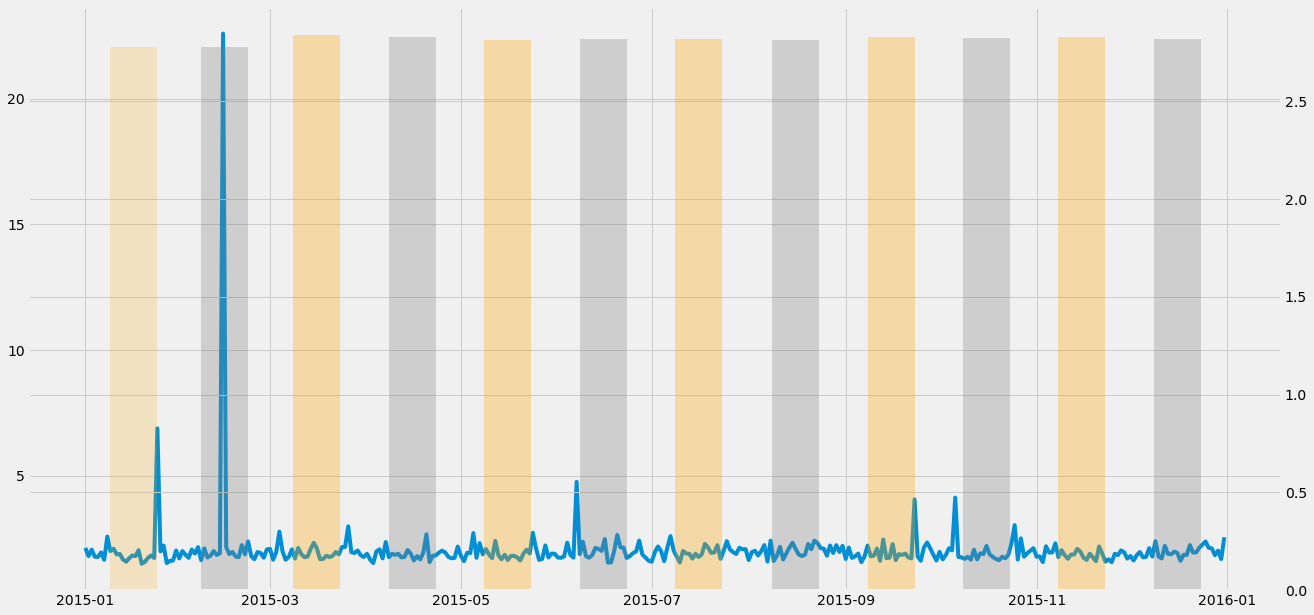

In [215]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(nee.groupby(['Date']).mean()['Number_of_Casualties'])

# ax2.bar(nee.groupby(pd.PeriodIndex(nee['Date'], freq="M"))['Accident_Severity'].mean())

height = nee['Accident_Severity'].value_counts().index
value = height = nee['Accident_Severity'].value_counts().values




ax2.bar(fy1_all.index.mean(), fy2_all.mean(),width=15, alpha=0.2, color='orange')
ax2.bar(fy2_all.index.mean(), fy2_all.mean(),width=15, alpha=0.3, color='gray')
ax2.bar(fy3_all.index.mean(), fy3_all.mean(),width=15, alpha=0.3, color='orange')
ax2.bar(fy4_all.index.mean(), fy4_all.mean(),width=15, alpha=0.3, color='gray')
ax2.bar(fy5_all.index.mean(), fy5_all.mean(),width=15, alpha=0.3, color='orange')
ax2.bar(fy6_all.index.mean(), fy6_all.mean(),width=15, alpha=0.3, color='gray')
ax2.bar(fy7_all.index.mean(), fy7_all.mean(),width=15, alpha=0.3, color='orange')
ax2.bar(fy8_all.index.mean(), fy8_all.mean(),width=15, alpha=0.3, color='gray')
ax2.bar(fy9_all.index.mean(), fy9_all.mean(),width=15, alpha=0.3, color='orange')
ax2.bar(fy10_all.index.mean(), fy10_all.mean(),width=15, alpha=0.3, color='gray')
ax2.bar(fy11_all.index.mean(), fy11_all.mean(),width=15, alpha=0.3, color='orange')
ax2.bar(fy12_all.index.mean(), fy12_all.mean(),width=15, alpha=0.3, color='gray')


# ax2.grid(b=False) # turn off grid #2

# ax1.set_title('Monthly Sales Revenue vs Number of Items Sold Per Month')
# ax1.set_ylabel('Monthly Sales Revenue')
# ax2.set_ylabel('Number of Items Sold')


In [209]:
nee.groupby(['Date']).mean()
#Accident_Severity
dataset.groupby(['junction_location', 'Accident_Severity']).mean()['Number_of_Casualties']
height = nee['Accident_Severity'].value_counts().index

height

Int64Index([3, 2, 1], dtype='int64')

In [94]:
dataset['date'] = pd.to_datetime(dataset.Date)

<AxesSubplot:xlabel='junction_location'>

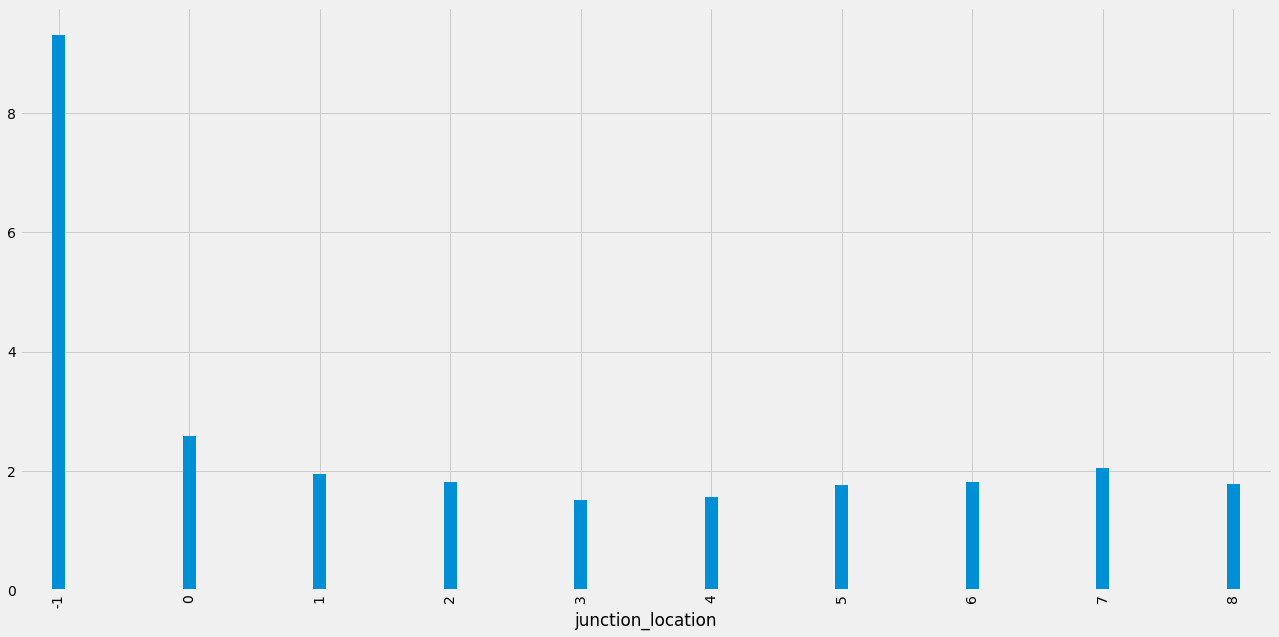

In [108]:
one = dataset.groupby(['Accident_Severity']).mean()['Number_of_Casualties'].plot(kind='bar', width = 0.1)
two = dataset.groupby(['junction_location']).mean()['Number_of_Casualties'].plot(kind='bar', width = 0.1)



In [179]:
yee = dataset[:5000]['Accident_Severity'].value_counts()

<AxesSubplot:>

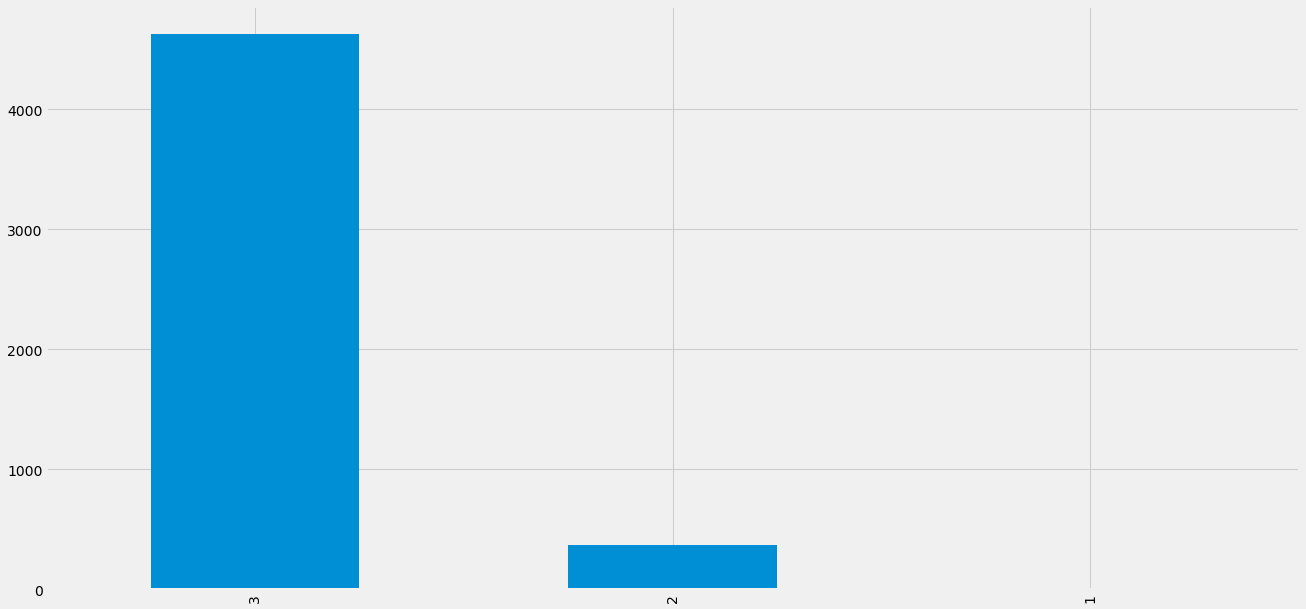

In [181]:
yee.plot.bar(stacked=True)
